# CAS Table to DataFrame
Downloading data from the SAS Viya Example Data Sets Website: https://support.sas.com/documentation/onlinedoc/viya/examples.htm

In [1]:
## Packages
import swat
import pandas as pd
from casConnect import connect_to_cas ## custom personal module

##
## Connect to CAS
##

## General connection syntax
# conn = swat.CAS(host, port, username, password)

## Viya for Learners 3.5 connection
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue, port=portValue, password=passwordToken)

## Personal connection
conn = connect_to_cas()

## Load the demonstration data into memory
Load the cars.csv file from the SAS Viya example data sets website into memory in the CAS server. Add a variety of formats and labels for the purpose of this demonstration.

In [15]:
fileurl = 'https://support.sas.com/documentation/onlinedoc/viya/exampledatasets/cars.csv'
castbl = conn.upload_file(fileurl, 
                          casout = {'name':'cars_cas_table', 
                                    'caslib':'casuser', 
                                    'replace':True},
                          importoptions = {
                              'fileType':'csv',
                              'guessRows':100,
                              'vars': {
                                  'Invoice':{'format':'dollar16.2','label':'Invoice Price'},
                                  'MSRP':{'format':'dollar16.2', 'label':'Manufacturer Suggested Retail Price'},
                                  'Weight':{'format':'comma16.'},
                                  'EngineSize':{'label':'Engine Size (L)'},
                                  'Length':{'label':'Length (IN)'},
                                  'MPG_City':{'label':'MPG (City)'},
                                  'MPG_Highway':{'label':'MPG (Highway)'}
                              }
                          })

NOTE: Cloud Analytic Services made the uploaded file available as table CARS_CAS_TABLE in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: The table CARS_CAS_TABLE has been created in caslib CASUSER(Peter.Styliadis@sas.com) from binary data uploaded to Cloud Analytic Services.


In [16]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS_CAS_TABLE,428,15,0,utf-8,2023-01-30T17:11:16+00:00,2023-01-30T17:11:16+00:00,2023-01-30T17:11:16+00:00,UTF8,1.990718e+09,0,0,0,,,0,Peter.Styliadis@sas.com,,2023-01-30T17:11:16+00:00,1.990718e+09


In [17]:
castbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Make,,1,varchar,13,13,,0,0
1,Model,,2,varchar,39,39,,0,0
2,Type,,3,varchar,6,6,,0,0
3,Origin,,4,varchar,6,6,,0,0
4,DriveTrain,,5,varchar,5,5,,0,0
5,MSRP,Manufacturer Suggested Retail Price,6,double,8,16,DOLLAR,16,2
6,Invoice,Invoice Price,7,double,8,16,DOLLAR,16,2
7,EngineSize,Engine Size (L),8,double,8,12,,0,0
8,Cylinders,,9,double,8,12,,0,0
9,Horsepower,,10,double,8,12,,0,0


## Pull the entire CAS table to the client as a SASDataFrame

In [18]:
df = castbl.to_frame()
display(type(df))

swat.dataframe.SASDataFrame

In [19]:
df.colinfo

{'Make': SASColumnSpec(attrs=dict(), dtype='varchar', name='Make', size=(1, 1), width=13),
 'Model': SASColumnSpec(attrs=dict(), dtype='varchar', name='Model', size=(1, 1), width=39),
 'Type': SASColumnSpec(attrs=dict(), dtype='varchar', name='Type', size=(1, 1), width=6),
 'Origin': SASColumnSpec(attrs=dict(), dtype='varchar', name='Origin', size=(1, 1), width=6),
 'DriveTrain': SASColumnSpec(attrs=dict(), dtype='varchar', name='DriveTrain', size=(1, 1), width=5),
 'MSRP': SASColumnSpec(attrs=dict(), dtype='double', format='DOLLAR16.2', label='Manufacturer Suggested Retail Price', name='MSRP', size=(1, 1), width=8),
 'Invoice': SASColumnSpec(attrs=dict(), dtype='double', format='DOLLAR16.2', label='Invoice Price', name='Invoice', size=(1, 1), width=8),
 'EngineSize': SASColumnSpec(attrs=dict(), dtype='double', label='Engine Size (L)', name='EngineSize', size=(1, 1), width=8),
 'Cylinders': SASColumnSpec(attrs=dict(), dtype='double', name='Cylinders', size=(1, 1), width=8),
 'Horsepowe

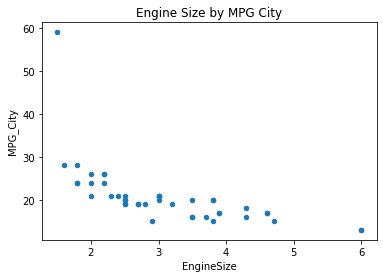

In [32]:
df.plot.scatter(x = 'EngineSize', y = 'MPG_City', title = "Engine Size by MPG City");

## Apply column labels to a SASDataFrame

In [21]:
df.apply_labels()

,Make,Model,Type,Origin,DriveTrain,Manufacturer Suggested Retail Price,Invoice Price,Engine Size (L),Cylinders,Horsepower,MPG (City),MPG (Highway),Weight,Wheelbase,Length (IN)
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
426,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


## Pull a sample of the CAS table to the client as a DataFrame

In [22]:
df = castbl.to_frame(sample_pct = .1, sample_seed = 99)
df.shape

(43, 15)

## Apply SAS formats to the SASDataFrame

In [26]:
df_formats = castbl.to_frame(format=True)

display(df_formats.head(), df_formats.dtypes)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945.00","$33,337.00",3.5,6,265,17,23,"4,451",106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820.00","$21,761.00",2,4,200,24,31,"2,778",101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990.00","$24,647.00",2.4,4,200,22,29,"3,230",105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195.00","$30,299.00",3.2,6,270,20,28,"3,575",108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755.00","$39,014.00",3.5,6,225,18,24,"3,880",115,197


Make           object
Model          object
Type           object
Origin         object
DriveTrain     object
MSRP           object
Invoice        object
EngineSize     object
Cylinders      object
Horsepower     object
MPG_City       object
MPG_Highway    object
Weight         object
Wheelbase      object
Length         object
dtype: object

## Terminate the CAS connection

In [37]:
conn.terminate()